# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
query_url = base_url + "&appid=" + weather_api_key + "&q="

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print(f'Beginning Data Retrieval')
print(f'-----------------------------')

for city in cities:
    try:
        response = requests.get(f'{query_url}{city}').json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f'Processing Record {record} | {city}')
        record = record + 1
    except KeyError:
        print(f'City not found. Skipping...')
    time.sleep(1)

Beginning Data Retrieval
-----------------------------
Processing Record 1 | edinburgh of the seven seas
Processing Record 2 | port-aux-francais
Processing Record 3 | iqaluit
Processing Record 4 | keflavik
Processing Record 5 | mandalgovi
Processing Record 6 | kodiak
Processing Record 7 | waitangi
Processing Record 8 | port elizabeth
Processing Record 9 | papatowai
Processing Record 10 | tolanaro
Processing Record 11 | adamstown
Processing Record 12 | hilo
Processing Record 13 | grytviken
Processing Record 14 | exu
Processing Record 15 | olonkinbyen
Processing Record 16 | stanley
Processing Record 17 | prince george
Processing Record 18 | puerto ayora
Processing Record 19 | port mathurin
Processing Record 20 | ushuaia
Processing Record 21 | tarinkot
Processing Record 22 | badger
Processing Record 23 | ilulissat
Processing Record 24 | ugoofaaru
Processing Record 25 | bilibino
Processing Record 26 | rusape
Processing Record 27 | invercargill
Processing Record 28 | pecan plantation
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(
                            {
                                "City":city,
                                "Lat":lat,
                                "Lng":lng,
                                "Max Temp":max_temp,
                                "Humidity":humidity,
                                "Cloudiness":cloudiness,
                                "Wind Speed":wind_speed,
                                "Country":country,
                                "Date":date
                            }
                         )

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nikolayevsk-on-amure,-37.0676,-12.3116,60.19,91,100,15.12,SH,1702525746
1,nikolayevsk-on-amure,-49.3500,70.2167,41.05,84,75,43.73,TF,1702525745
2,nikolayevsk-on-amure,63.7506,-68.5145,8.33,72,75,5.75,CA,1702525724
3,nikolayevsk-on-amure,64.0049,-22.5624,39.63,81,75,48.34,IS,1702525754
4,nikolayevsk-on-amure,45.7625,106.2708,-3.12,90,100,14.99,MN,1702525985


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("..//output_data//cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("..//output_data//cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nikolayevsk-on-amure,-37.0676,-12.3116,60.19,91,100,15.12,SH,1702525746
1,nikolayevsk-on-amure,-49.3500,70.2167,41.05,84,75,43.73,TF,1702525745
2,nikolayevsk-on-amure,63.7506,-68.5145,8.33,72,75,5.75,CA,1702525724
3,nikolayevsk-on-amure,64.0049,-22.5624,39.63,81,75,48.34,IS,1702525754
4,nikolayevsk-on-amure,45.7625,106.2708,-3.12,90,100,14.99,MN,1702525985


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

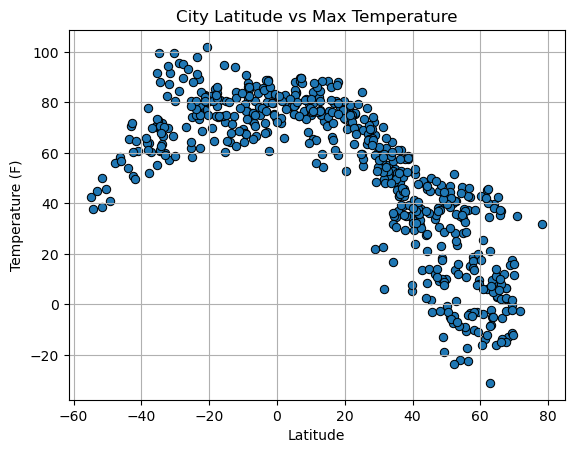

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidth = .75)


# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("..//output_data//Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

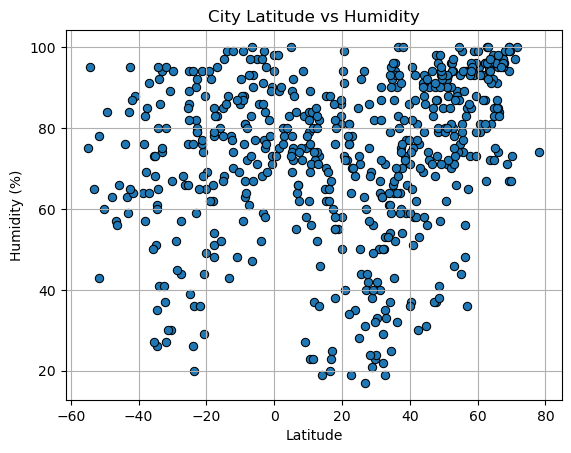

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidth = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("..//output_data//Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

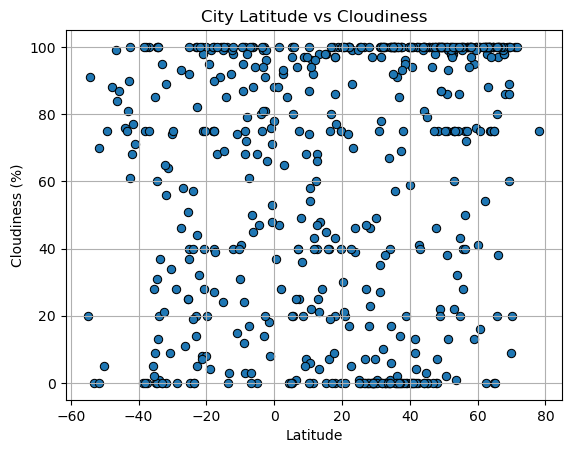

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidth = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("..//output_data//Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

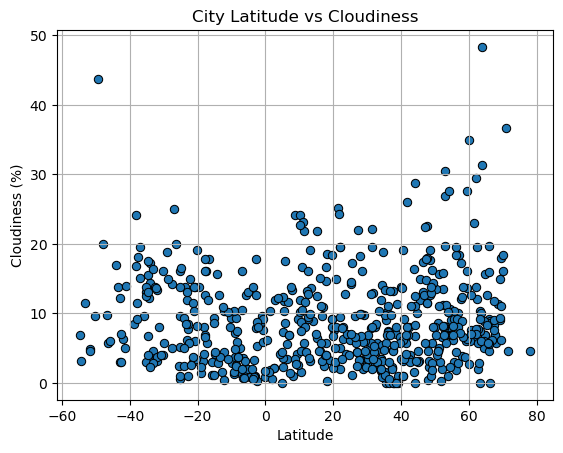

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidth = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("..//output_data//Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

NameError: name 'north' is not defined

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,nikolayevsk-on-amure,63.7506,-68.5145,8.33,72,75,5.75,CA,1702525724
3,nikolayevsk-on-amure,64.0049,-22.5624,39.63,81,75,48.34,IS,1702525754
4,nikolayevsk-on-amure,45.7625,106.2708,-3.12,90,100,14.99,MN,1702525985
5,nikolayevsk-on-amure,57.7900,-152.4072,18.91,73,100,17.27,US,1702525758
11,nikolayevsk-on-amure,19.7297,-155.0900,76.73,81,75,9.22,US,1702525693


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nikolayevsk-on-amure,-37.0676,-12.3116,60.19,91,100,15.12,SH,1702525746
1,nikolayevsk-on-amure,-49.3500,70.2167,41.05,84,75,43.73,TF,1702525745
6,nikolayevsk-on-amure,-43.9535,-176.5597,53.82,76,76,17.00,NZ,1702525743
7,nikolayevsk-on-amure,-33.9180,25.5701,63.32,92,20,17.27,ZA,1702525760
8,nikolayevsk-on-amure,-46.5619,169.4708,56.71,57,99,9.71,NZ,1702525758


###  Temperature vs. Latitude Linear Regression Plot

In [24]:
linear_regression = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')

The r-squared is: -0.855


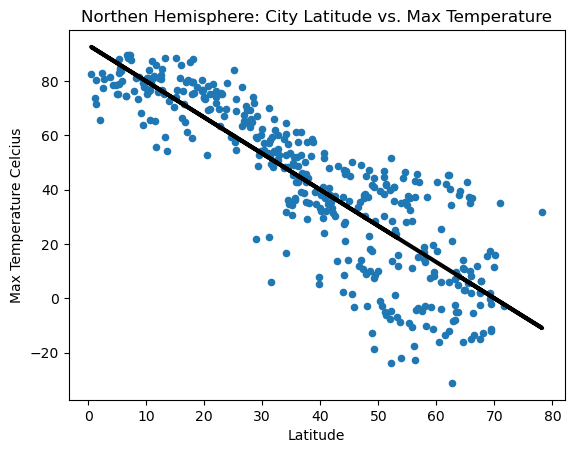

In [25]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Max Temp',)

plt.plot(
    northern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Northen Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.show()

In [27]:
linear_regression = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')

The r-squared is: 0.506


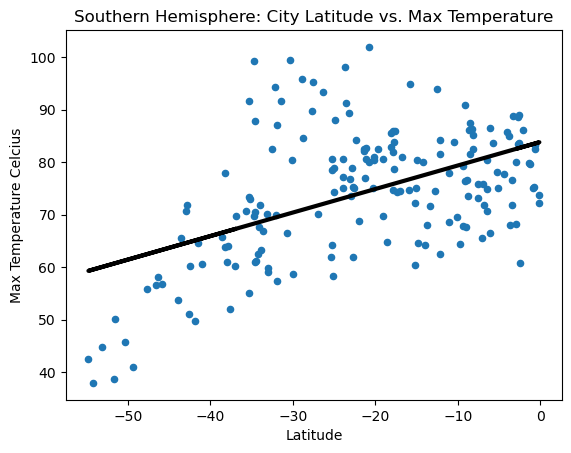

In [29]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Max Temp',)
    

plt.plot(
    southern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.361


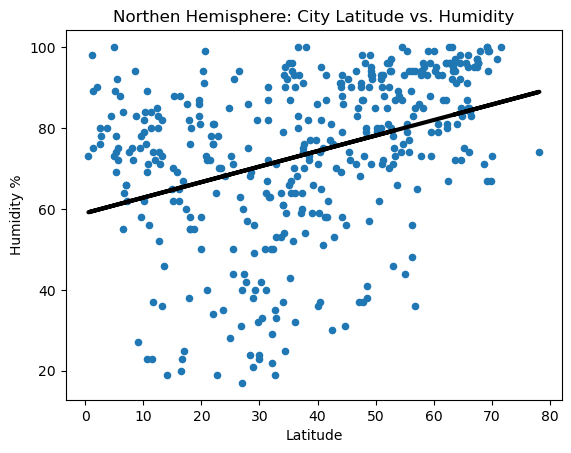

In [30]:
# Northern Hemisphere
linear_regression = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"].astype('float'))
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
northern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Humidity',)

plt.plot(
    northern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Northen Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

The r-squared is: 0.25


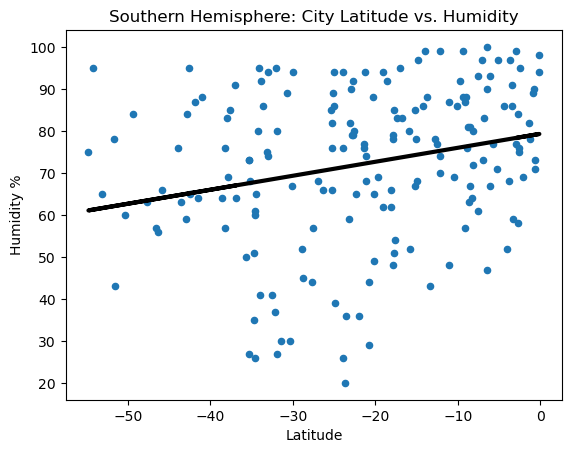

In [31]:
# Southern Hemisphere
linear_regression = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'].astype('float'))
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
southern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Humidity',)

plt.plot(
    southern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.298


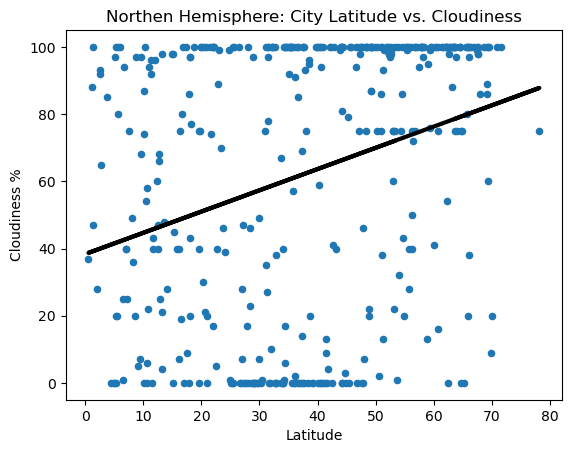

In [32]:
# Northern Hemisphere
linear_regression = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'].astype('float'))
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
northern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Cloudiness',)

plt.plot(
    northern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Northen Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

The r-squared is: 0.147


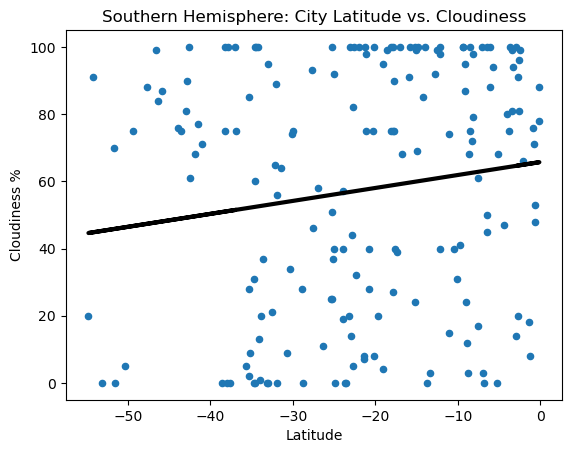

In [33]:
# Southern Hemisphere
linear_regression = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'].astype('float'))
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
southern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Cloudiness',)

plt.plot(
    southern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.123


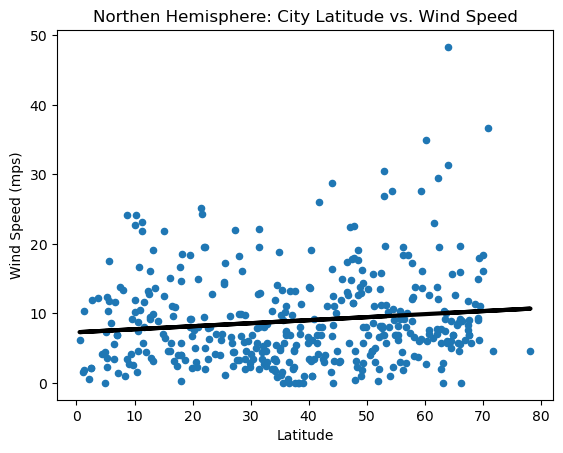

In [34]:
# Northern Hemisphere
linear_regression = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'].astype('float'))
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
northern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Wind Speed',)
plt.plot(
    northern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')
plt.title('Northen Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.show()

The r-squared is: -0.321


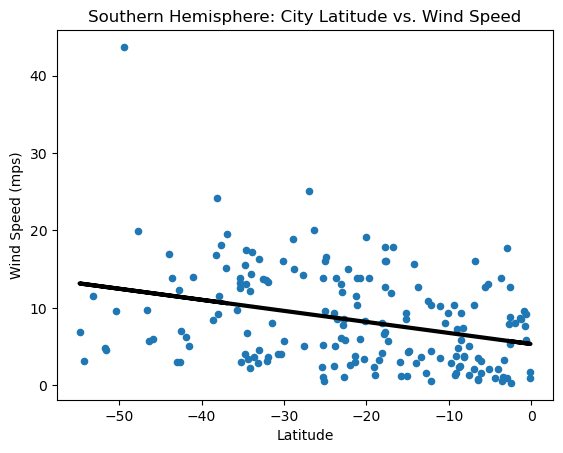

In [35]:
# Southern Hemisphere
linear_regression = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'].astype('float'))
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
southern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Wind Speed',)
plt.plot(
    southern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')
plt.title('Southern Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE